# Resumen

In [1]:
import numpy as np

## Numpy

In [4]:
# tensores de rango 2
x = np.array([[1,2], [3,4]])
y = np.array([[5,6], [7,8]])

# tensores de rango 1
v = np.array([9,10])
w = np.array([11,12])

# producto escalar
print(f'producto escalar: {np.dot(v,w)}')

# producto matrox vector
print(f'producto matrix-vector: {np.dot(x,v)}')

# producto matrixes
print(f'producto matrixes:\n {np.dot(x,y)}')

producto escalar: 219
producto matrix-vector: [29 67]
producto matrixes:
 [[19 22]
 [43 50]]


### Algunas funciones

Tipos de arrays

In [72]:
# asignar tipo de dato al array
# dtype='tipo_dato+arquitectura'
arr = np.array([[1,2],[3,4]], dtype='i4')
print(arr, arr.dtype)

# convertir todo un array existente
newarr = arr.astype(int)
print(newarr.dtype)

[[1 2]
 [3 4]] int32
int64


Dimensiones

In [73]:
# num de fila y columna
arr.shape
# redimensionar
arr.reshape(4,1)

array([[1],
       [2],
       [3],
       [4]], dtype=int32)

Iteraciones

In [74]:
# iterar array
for i in np.nditer(arr):
    print(i, end=' ')

1 2 3 4 

Operaciones

In [75]:
# operaciones de array
# axis= 0 o 1
arr_n = np.concatenate((x,y), axis=1)
print('\n',arr_n)


 [[1 2 5 6]
 [3 4 7 8]]


Dividir un array

In [76]:
# dividir un array
other_arr = np.array_split(arr_n, 2)
print('\n', other_arr)


 [array([[1, 2, 5, 6]]), array([[3, 4, 7, 8]])]


Buscar dentro de un array

In [96]:
# busqueda en arrays
b = np.where(arr_n == 4)
c = np.where(arr_n%2 == 0)
print(b,'\n', c)


(array([1]), array([1])) 
 (array([0, 0, 1, 1]), array([1, 3, 1, 3]))


Ordenando arrays

In [98]:
ap = np.array([4,6,3,2,7,8])
order = np.sort(ap)
print(order)

[2 3 4 6 7 8]


Filtrando array

In [101]:
f = [True, False, True, False, True, False]
arr_f = ap[f]
print(arr_f)

[4 3 7]


## Scipy

In [6]:
# pip install scipy, imageio, Pillow, scikit-image
import imageio
import skimage
from skimage import transform

In [18]:
# leear imagen a un array np
img = imageio.imread("../data/raw/f.jpg")
print(img.dtype, img.shape)

# tintar imagen
img_tint = img * [1, 0.45, 0.3]

# guardar img tintada
imageio.imsave('../data/processed/f_t.jpg', img_tint)

# redimensionar img tintada
img_tint_size = skimage.transform.resize(img_tint, (300,300))

# guardar img resultante
imageio.imsave('../data/processed/f_t_r.jpg', img_tint_size)
img_resize = imageio.imread("../data/processed/f_t_r.jpg")
print(img_resize.shape)

/tmp/ipykernel_5177/3939934061.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread("../data/raw/f.jpg")
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.172570864459942, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


uint8 (400, 600, 3)
(300, 300, 3)


/tmp/ipykernel_5177/3939934061.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_resize = imageio.imread("../data/processed/f_t_r.jpg")


## Scikit-learn

In [20]:
# pip install scikit-learn
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [24]:
# cargar dataset
dataset = datasets.load_iris()

# ajustar datos mediante CART
model = DecisionTreeClassifier()
model.fit(dataset.data, dataset.target)
print(model)

# realizar predicciones
expected = dataset.target
predicted = model.predict(dataset.data)

# resumen del modelo
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


## Theano

In [ ]:
# pip install theano
import theano
import theano.tensor as T

x = T.dmatrix('x')
s = 1 / (1 + T.exp(-x))
logistic = theano.function([x], s)
y = logistic([[0, 1], [-1, -2]])
print(y)

## TensorFlow

In [32]:
# pip install tensorflow
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

2023-01-23 15:30:25.705218: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-23 15:30:28.202816: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-23 15:30:28.203467: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-23 15:30:38.763004: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [34]:
# cargar y preparar los datos
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# convertir de entero a flotante
x_train, x_test = x_train / 255.0, x_test / 255.0

# construir modelo
model_tf = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_tf.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# entrenar y evaluar modelo
model_tf.fit(x_train, y_train, epochs=5)
model_tf.evaluate(x_test, y_test, verbose=2)

2023-01-23 15:38:08.277783: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-23 15:38:08.281431: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-23 15:38:08.282409: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pc): /proc/driver/nvidia/version does not exist
2023-01-23 15:38:08.309736: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-23 15:38:15.474102: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] 

Epoch 1/5
1875/1875 [==============================] - 13s 5ms/step - loss: 0.2938 - accuracy: 0.9147
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1445 - accuracy: 0.9574
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1076 - accuracy: 0.9679
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0876 - accuracy: 0.9733
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0749 - accuracy: 0.9764


2023-01-23 15:39:12.744560: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 - 1s - loss: 0.0732 - accuracy: 0.9767 - 949ms/epoch - 3ms/step


[0.07322162389755249, 0.9767000079154968]

### Importación de Datos

### Formato txt

In [112]:
import os

# conocer la ruta de trabajo
os.chdir('.')
print(os.getcwd())

/mnt/c/Users/USUARIO/Documents/tmp/unir/tecnicas_IA/tecnicas_ia/data/raw


In [113]:
# leer un archivo
file = './txt.txt'
open_file = open(file, 'r')
txt = open_file.read()
open_file.close()
print(txt)

### Formato csv

In [ ]:
import csv

f = open('.csv')
reader = csv.reader(f)

for row in reader:
    print(row)

### Csv mediante Numpy

In [ ]:
# skiprows para especificar cabeceras
data = np.loadtxt(f, delimiter=',', skiprows=1)
print(data)

### Csv mediante Pandas

In [ ]:
import pandas as pd

df = pd.read_csv(f, header=0)
print(df.head())

### Desde URL con Pandas

In [ ]:
url = 'ruta'
df_url = pd.read_csv(url)
print(df_url)

## Maching Learning

### Estadísticas

In [116]:
from scipy import stats

speed = [45,67,85,96,35,74,67,85,23,77]

print(np.mean(speed))
print(np.median(speed))
print(stats.mode(speed))
print(np.std(speed))
print(np.var(speed))
print(np.percentile(speed, 75))

65.4
70.5
ModeResult(mode=array([67]), count=array([2]))
22.486440358580545
505.64
83.0


/tmp/ipykernel_5177/42120929.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(stats.mode(speed))


### Distribución de datos

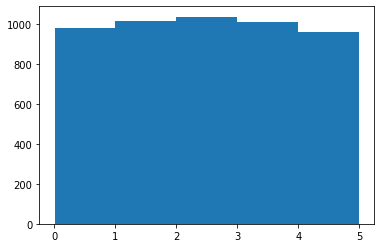

In [118]:
import matplotlib.pyplot as plt

p = np.random.uniform(0.0, 5.0, 5000)

plt.hist(p, 5);

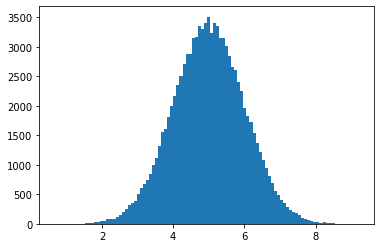

In [124]:
p = np.random.normal(5.0, 1.0, 100000)

plt.hist(p, 100);

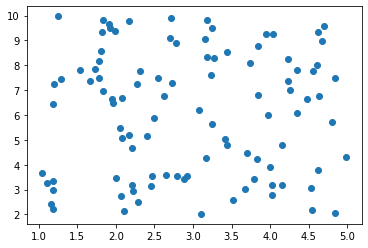

In [126]:
h = np.random.uniform(5.0, 1.0, 100)
j = np.random.uniform(10.0, 2.0, 100)

plt.scatter(h, j);

### Regresiones

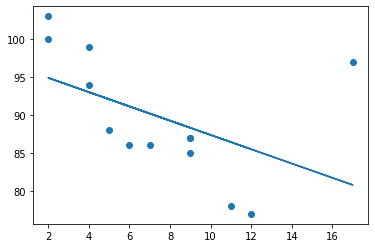

In [133]:
n = [4,7,9,5,2,17,2,9,4,11,12,9,6]
m = [99,86,87,88,100,97,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(n,m)

def myfunc(n):
    return slope * n + intercept

mymodel = list(map(myfunc, n))

plt.scatter(n,m)
plt.plot(n, mymodel)
plt.show()

### Mediante Numpy

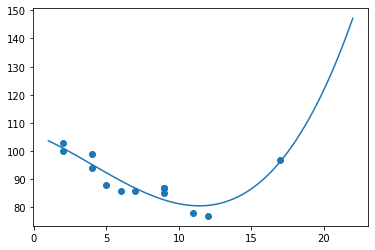

In [140]:
model2 = np.poly1d(np.polyfit(n,m,3))
myline = np.linspace(1,22,100)

plt.scatter(n,m)
plt.plot(myline, model2(myline));

### Con Pandas y Scikit-learn

In [ ]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(n,m)
print(regr.coef_)

# predecir
predict = regr.predict([[val1, val2]])
print(predict)